#**Calidad de datos**

En el presente notebook se documenta el proceso de calidad de datos para el conjunto de datos **“Calories Burnt Prediction”** para la **"práctica 4: calidad y minería de datos en Python"**, el cual consiste en 4 etapas:

1. Perfilamiento de datos.

2. Diagnóstico de las dimensiones según el perfilado.

3. Limpieza de los datos.

4. Mejora de los datos.

#**1. Perfilamiento de datos**

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
# Se cargan los datos
data= pd.read_csv("calories.csv")
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
#Corrección del tipo de datos object a categorías
data['Gender']=data['Gender'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   User_ID     15000 non-null  int64   
 1   Gender      15000 non-null  category
 2   Age         15000 non-null  int64   
 3   Height      15000 non-null  float64 
 4   Weight      15000 non-null  float64 
 5   Duration    15000 non-null  float64 
 6   Heart_Rate  15000 non-null  float64 
 7   Body_Temp   15000 non-null  float64 
 8   Calories    15000 non-null  float64 
dtypes: category(1), float64(6), int64(2)
memory usage: 952.4 KB


In [5]:
#Instalar pandas profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b50c19dab94f0057e3e451d7192f4c24d2147eb0e2f93134d864dc0e29a27de6
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False)
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 67.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="perfilamiento.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#**2. Diagnóstico de las dimensiones según el perfilado**



*   **Completitud:** Los datos del dataset poseen una alta completitud, evidenciada en la inexistencia de nulos.

* **Exactitud:** Los datos del dataset poseen una alta exactitud debido a la ausencia de datos incorrectos o datos atípicos.

* **Conformidad:** Los datos poseen una alta conformidad, ya que ninguna de las variables requiere un formato específico; sin embargo, es recomendable poner las unidades de las variables en los títulos para evitar confusiones.
*   **Oportunidad:** No se puede determinar el nivel de oportunidad del dataset debido a que no se posee la información necesaria.
* **Duplicidad:** El dataset posee una baja duplicidad evidenciada en la ausencia de registros duplicados y la imposibilidad de calcular los mismos objetos de datos en el conjunto de datos.
* **Integridad:** El dataset posee una alta integridad debido a que posee las variables más importantes para predecir el número de calorías quemadas por una persona; sin embargo, el dataset también se beneficiaría de tener otras variables como tipo de actividad e intensidad.






#**3. Limpieza de los datos**

**Limpieza de duplicados**

In [8]:
#El dataset no posee registros duplicados.

**Selección de datos**

In [9]:
# Se elimina la variable "User_ID", ya que es irrelevante para la minería de datos.
data = data.drop('User_ID',axis=1)
data.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0

**Limpieza de atípicos**

In [10]:
# El dataset no posee datos atípicos.

**Limpieza de nulos**

In [11]:
# El dataset no posee datos nulos.

#**4. Mejora de los datos**

In [12]:
# Se crean dummies para las variables categóricas.
data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
0   68   190.0    94.0      29.0       105.0       40.8     231.0            1
1   20   166.0    60.0      14.0        94.0       40.3      66.0            0
2   69   179.0    79.0       5.0        88.0       38.7      26.0            1
3   34   179.0    71.0      13.0       100.0       40.5      71.0            0
4   27   154.0    58.0      10.0        81.0       39.8      35.0            0

In [13]:
# Matriz de correlaciones
data_num.corr()

Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age          1.000000  0.009554  0.090094  0.013247    0.010482   0.013175   
Height       0.009554  1.000000  0.958451 -0.004625    0.000528   0.001200   
Weight       0.090094  0.958451  1.000000 -0.001884    0.004311   0.004095   
Duration     0.013247 -0.004625 -0.001884  1.000000    0.852869   0.903167   
Heart_Rate   0.010482  0.000528  0.004311  0.852869    1.000000   0.771529   
Body_Temp    0.013175  0.001200  0.004095  0.903167    0.771529   1.000000   
Calories     0.154395  0.017537  0.035481  0.955421    0.897882   0.824558   
Gender_male  0.003222  0.710534  0.783186  0.003440    0.011555   0.007264   

             Calories  Gender_male  
Age          0.154395     0.003222  
Height       0.017537     0.710534  
Weight       0.035481     0.783186  
Duration     0.955421     0.003440  
Heart_Rate   0.897882     0.011555  
Body_Temp    0.824558     0.007264  
Calories     1.000000     0.022357  
Gender_male  0.022357     1.000000

<Axes: >

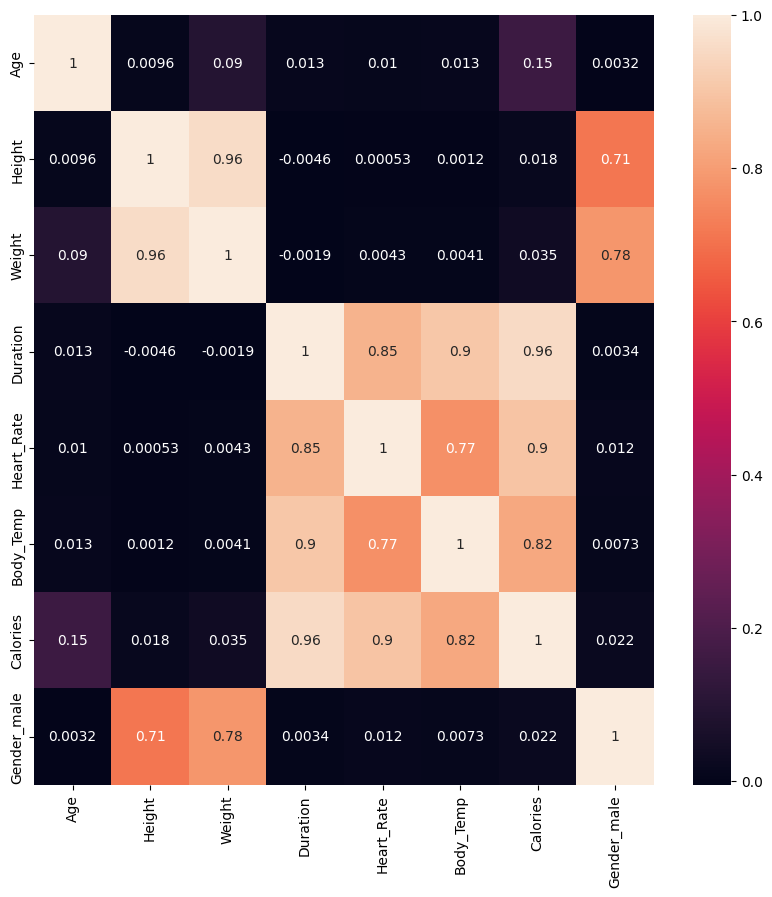

In [14]:
# Heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

**Análisis de la matriz de correlaciones**

Con la matriz de correlaciones generada podemos realizar dos análisis: uno de **variables redundantes** y otro de **variables irrelevantes**.

Una vez realizado el **análisis de las variables redundantes**, podemos identificar que las variables que poseen una correlación peligrosamente alta son:

* Height y Weight (0.96)

* Heart_Rate y Duration (0.85)

* Duration y Body_Temp (0.90)

Una vez identificamos estas correlaciones peligrosamente altas, buscamos qué tanto cada una de estas variables aporta a la variable objetivo y eliminamos la que menos aporte. De forma que:

* Entre Height (0.018) y Weight (0.035), eliminamos Height.

* Entre Heart_Rate (0.9) y Duration (0.96), eliminamos Heart_Rate.

* Entre Duration (0.96) y Body_Temp (0.82), eliminamos Body_Temp.


Por último, una vez realizado el **análisis de variables irrelevantes**, podemos concluir que las variables que menos aportan para predecir a la variable objetivo son Gender (0.022) y Height (0.018), ya que la correlación con la variable objetivo de todas se encuentra por debajo de 0.025; por lo tanto, se deben eliminar.

In [15]:
# Eliminamos Height, Heart_Rate y Body_Temp.
data = data.drop('Height',axis=1)
data = data.drop('Heart_Rate',axis=1)
data = data.drop('Body_Temp',axis=1)

# Eliminamos Gender
data = data.drop('Gender',axis=1)

data.head()

Age  Weight  Duration  Calories
0   68    94.0      29.0     231.0
1   20    60.0      14.0      66.0
2   69    79.0       5.0      26.0
3   34    71.0      13.0      71.0
4   27    58.0      10.0      35.0

In [16]:
#Guardamos los datos preparados
data.to_csv('./datos_calorias.csv', index=False)